In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import h5py
from scipy.cluster.hierarchy import fcluster, linkage
from collections import Counter

In [2]:
fns = sorted(os.listdir('../processed_data/adj_expression/'))

data = []
id2tissue = []
for i, f in enumerate(fns[:1]):
    tissue = f.split('-')[0]
    with open('../processed_data/model_genes/%s-model_genes.txt' % tissue, 'rb') as reader:
        id2gene = [s.strip() for s in reader.readlines()]
    id2gene = np.array(id2gene)
    
    df_exp = pd.read_csv('../processed_data/adj_expression/' + f, index_col=0)
    df_exp.columns = [g.split('.')[0] for g in df_exp.columns]
    
    
    df_exp = df_exp[id2gene] 
    data = df_exp.values
    
    pca_models = []
    with h5py.File('../processed_data/model_weights/%s-eigengene_model.h5' % tissue, 'r') as reader:
        for k in sorted(reader['weights'].keys()):
            pca_genes = reader['weights'][k]['genes'][...]
            pca_weight = reader['weights'][k]['pca_weights'][...]
            pca_sig = reader['weights'][k]['pca_sig'][...]
            pca_models.append((k, pca_genes, pca_weight, pca_sig))


In [3]:
df_exp.to_csv('../R_script/sliced_data/%s-adj_expression.txt' % tissue, index=None)

In [4]:
len(id2gene)

7139

In [5]:
eigen_genes = []
for k, pca_genes, pca_weight, pca_sig in pca_models:
    data = df_exp[pca_genes] 
    score = data.dot(pca_weight)
    assert( np.abs(score.std() - pca_sig ) < 0.01)
    eigen_genes.append(score)

In [6]:
eigen_genes = np.vstack(eigen_genes).T

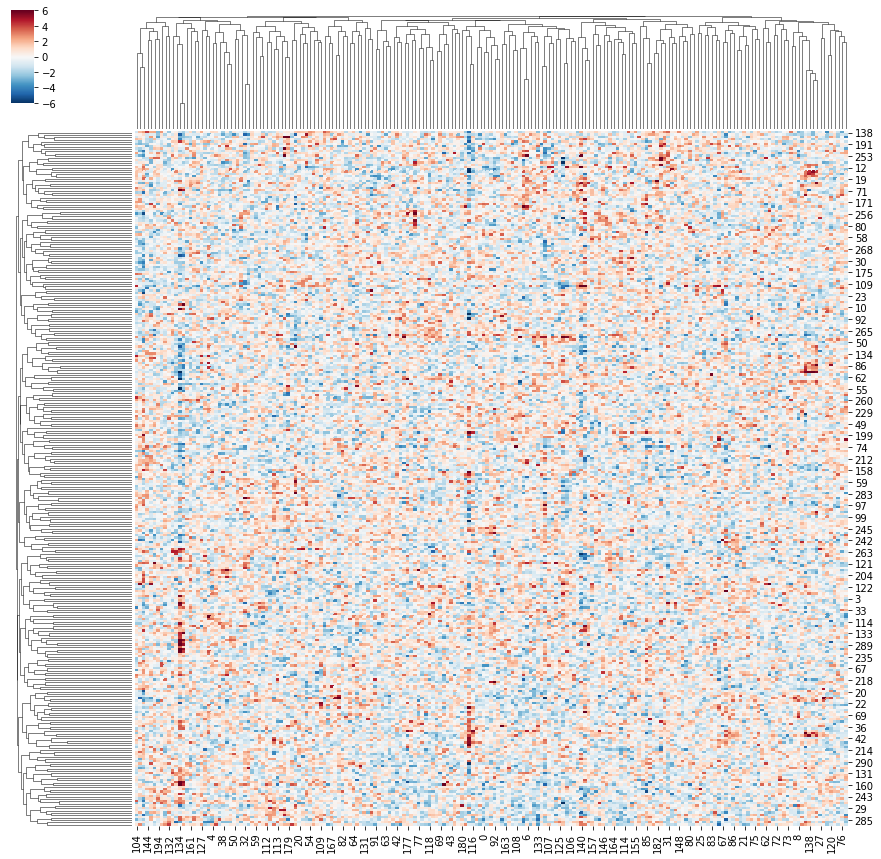

In [14]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.clustermap(eigen_genes, cmap = 'RdBu_r', vmax = 6.0, vmin = -6.0, metric='correlation', figsize = (15, 15))
plt.show()

In [127]:
np.corrcoef(eigen_genes.T)

array([[ 1.        , -0.56691226, -0.62946282, ..., -0.05107718,
        -0.01067453, -0.07005089],
       [-0.56691226,  1.        ,  0.67316665, ...,  0.06697521,
         0.0426349 ,  0.08103453],
       [-0.62946282,  0.67316665,  1.        , ...,  0.05406985,
         0.0476557 ,  0.11510355],
       ...,
       [-0.05107718,  0.06697521,  0.05406985, ...,  1.        ,
         0.13489727,  0.03853981],
       [-0.01067453,  0.0426349 ,  0.0476557 , ...,  0.13489727,
         1.        , -0.04818801],
       [-0.07005089,  0.08103453,  0.11510355, ...,  0.03853981,
        -0.04818801,  1.        ]])

In [230]:
df_exp = pd.read_csv('../processed_data/adj_expression/' + f, index_col=0)
df_exp.columns = [g.split('.')[0] for g in df_exp.columns]


df_exp = df_exp[id2gene] 
data = df_exp.values
connectivity = np.abs(np.corrcoef(data.T))

In [231]:
connectivity.shape

(6439, 6439)

In [258]:
## heirarchical clustering

#tmp = (eigen_genes - np.mean(eigen_genes, axis = 0, keepdims=True) ) / np.std(eigen_genes, axis = 0, keepdims=True)
#tmp = connectivity
#tmp = tmp.T
tmp = data.T
Z = linkage(tmp, method='ward', metric='euclidean')

In [272]:
res = []
for thres in np.arange(.5, 2.0, 0.1):
    ind_c = fcluster(Z, thres, criterion='inconsistent')
    g, c = Counter(ind_c).most_common(1)[0]
    res.append((thres, c))

### determining cut-off for heirarchical clustering
for t, c in res:
    if c < 10:
        thres = t
        
## heirarchical clustering with the selected cut-off
ind_c = fcluster(Z, thres, criterion='inconsistent')

In [273]:
Counter(ind_c).most_common()

[(1004, 9),
 (1550, 7),
 (3, 6),
 (5, 6),
 (1003, 6),
 (1528, 6),
 (1701, 6),
 (2139, 6),
 (2780, 6),
 (6, 5),
 (13, 5),
 (696, 5),
 (757, 5),
 (866, 5),
 (935, 5),
 (948, 5),
 (1233, 5),
 (1293, 5),
 (1313, 5),
 (1529, 5),
 (2145, 5),
 (2358, 5),
 (2371, 5),
 (2561, 5),
 (2783, 5),
 (2, 4),
 (41, 4),
 (59, 4),
 (250, 4),
 (257, 4),
 (259, 4),
 (519, 4),
 (753, 4),
 (756, 4),
 (805, 4),
 (839, 4),
 (867, 4),
 (937, 4),
 (951, 4),
 (999, 4),
 (1000, 4),
 (1067, 4),
 (1533, 4),
 (1671, 4),
 (1693, 4),
 (1696, 4),
 (1875, 4),
 (1877, 4),
 (1878, 4),
 (2230, 4),
 (2313, 4),
 (2318, 4),
 (2324, 4),
 (2448, 4),
 (2562, 4),
 (2704, 4),
 (2799, 4),
 (2811, 4),
 (2932, 4),
 (1, 3),
 (4, 3),
 (7, 3),
 (9, 3),
 (17, 3),
 (22, 3),
 (29, 3),
 (34, 3),
 (45, 3),
 (46, 3),
 (47, 3),
 (50, 3),
 (65, 3),
 (70, 3),
 (81, 3),
 (82, 3),
 (91, 3),
 (94, 3),
 (103, 3),
 (116, 3),
 (125, 3),
 (126, 3),
 (134, 3),
 (141, 3),
 (149, 3),
 (150, 3),
 (177, 3),
 (184, 3),
 (185, 3),
 (193, 3),
 (194, 3),
 (195, 3

In [274]:
ind_c.shape

(6439,)

In [275]:
import pickle
with open('ensembl2genename.p', 'rb') as reader:
    gid2gn = pickle.load(reader)


for c, _ in Counter(ind_c).most_common(10):
    print c
    
    for i in np.where(ind_c == c)[0]:
        g = id2gene[i]
        print gid2gn[g]
    print

1004
RPS8
RPL27A
RPS13
RPL36
RPL14
RPL29
RPS20
RPS6
RPL12

1550
ENSG00000182500
PLEKHG3
CATSPERB
FNDC11
OLIG2
OLIG1
PDGFB

3
SERPINC1
ITIH2
HPD
APOC1
APOC2
ACMSD

5
PAH
CPB2
AHSG
ADH4
C9
BHMT

1003
RPLP0
RPS5
RPL3
RPSA
RPL10A
RPL8

1528
COL17A1
TCN1
OLFM4
CEACAM6
BPI
ABCA13

1701
RGS4
SYT1
CACNG7
PEG3
KIF1A
GRIN1

2139
FUT11
ASCL2
GPR83
C17orf97
N6AMT1
SNAPC3

2780
ASPM
KIF11
ESPL1
TOP2A
SPC24
TPX2

6
C8A
F2
TM4SF5
TM4SF4
PLG



In [276]:
clf = PCA(n_components = 1, whiten=False)

eigen_genes = []
res_ratio = []
## PCA
for c in set(ind_c):
    if np.sum(ind_c == c) < 2:
        continue
    data0 = data[:, ind_c == c]
    clf.fit(data0)
    tmp = clf.transform(data0)
    eigen_genes.append(tmp)
    res_ratio.append(clf.explained_variance_ratio_[0])
eigen_genes = np.hstack(eigen_genes)

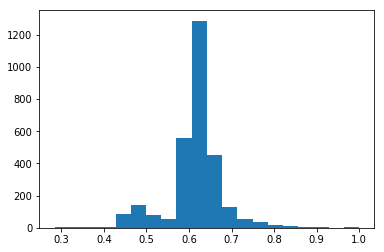

In [277]:
plt.hist(res_ratio, bins = 20)
plt.show()

In [278]:
eigen_genes.shape

(338, 2948)

In [293]:
## heirarchical clustering
#connectivity = np.abs(np.corrcoef(eigen_genes.T))
tmp = (eigen_genes - np.mean(eigen_genes, axis = 0, keepdims=True) ) / np.std(eigen_genes, axis = 0, keepdims=True)
#tmp = connectivity
tmp = tmp.T
Z = linkage(tmp,
            method='ward', metric='euclidean')

In [294]:
res = []
for thres in np.arange(.5, 2.0, 0.1):
    ind_c = fcluster(Z, thres, criterion='inconsistent')
    g, c = Counter(ind_c).most_common(1)[0]
    res.append((thres, c))

### determining cut-off for heirarchical clustering
for t, c in res:
    if c < 10:
        thres = t
        
ind_c = fcluster(Z, thres, criterion='inconsistent')

In [295]:
clf = PCA(n_components = 1, whiten=False)

meta_eigen_genes = []

## PCA
res = []
for c in set(ind_c):
    
    data0 = eigen_genes[:, ind_c == c]
    clf.fit(data0)
    tmp = clf.transform(data0)
    meta_eigen_genes.append(tmp)
    res.append(clf.explained_variance_ratio_[0])
    
meta_eigen_genes = np.hstack(meta_eigen_genes)

In [296]:
meta_eigen_genes.shape

(338, 1333)

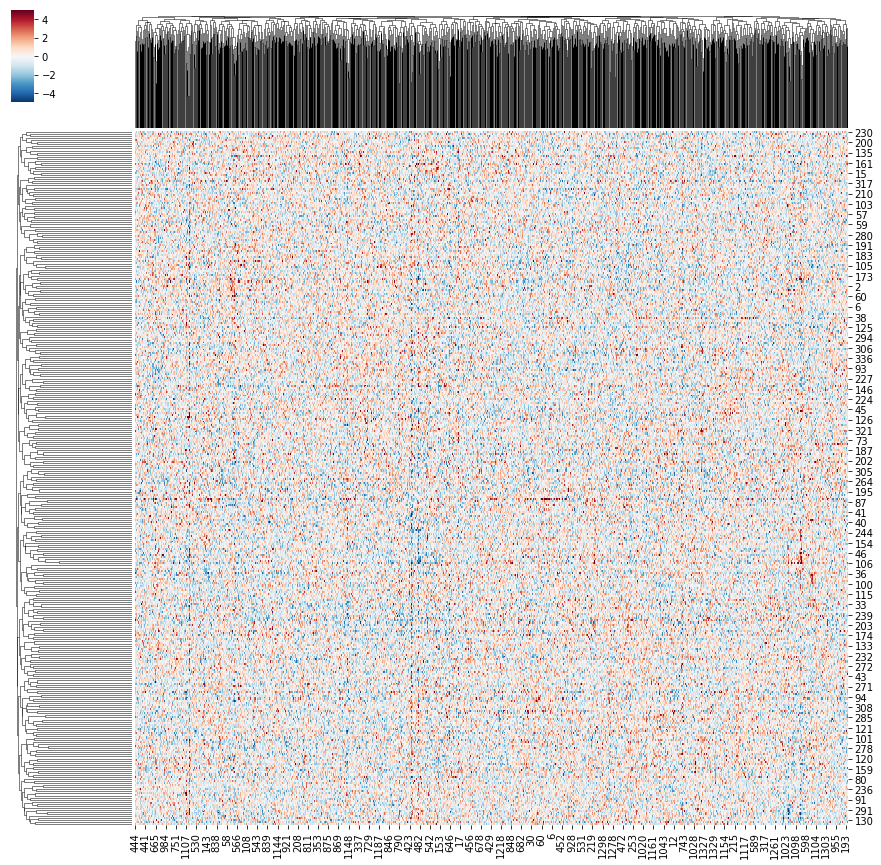

In [297]:
sns.clustermap(meta_eigen_genes, cmap = 'RdBu_r', figsize = (15, 15), metric='correlation', vmax = 5.0, vmin = -5.0)
plt.show()

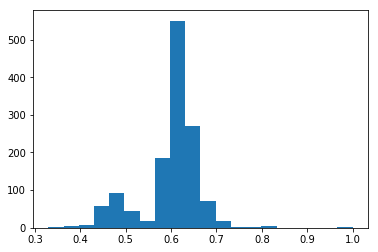

In [298]:
plt.hist(res, bins = 20)
plt.show()

In [288]:
clf.components_

array([[0.7094984 , 0.70470704]])

In [301]:
meta_eigen_genes.shape

(338, 1333)

In [302]:
## heirarchical clustering
connectivity = np.abs(np.corrcoef(meta_eigen_genes.T))
#tmp = meta_eigen_genes
tmp = connectivity
#tmp = tmp.T
Z = linkage(tmp, method='ward', metric='euclidean')

In [307]:
res = []
for thres in np.arange(.5, 2.0, 0.1):
    ind_c = fcluster(Z, thres, criterion='inconsistent')
    g, c = Counter(ind_c).most_common(1)[0]
    res.append((thres, c))

### determining cut-off for heirarchical clustering
for t, c in res:
    if c < 10:
        thres = t
        
ind_c = fcluster(Z, thres, criterion='inconsistent')

In [308]:
clf = PCA(n_components = 1, whiten=False)

meta_eigen_genes2 = []

## PCA
res = []
for c in set(ind_c):
    
    data0 = meta_eigen_genes[:, ind_c == c]
    clf.fit(data0)
    tmp = clf.transform(data0)
    meta_eigen_genes2.append(tmp)
    res.append(clf.explained_variance_ratio_[0])
    
meta_eigen_genes2 = np.hstack(meta_eigen_genes2)

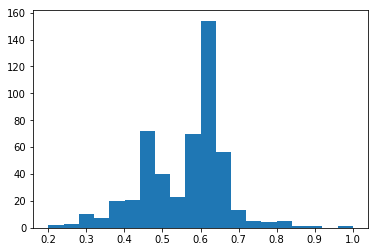

In [309]:
plt.hist(res, bins = 20)
plt.show()

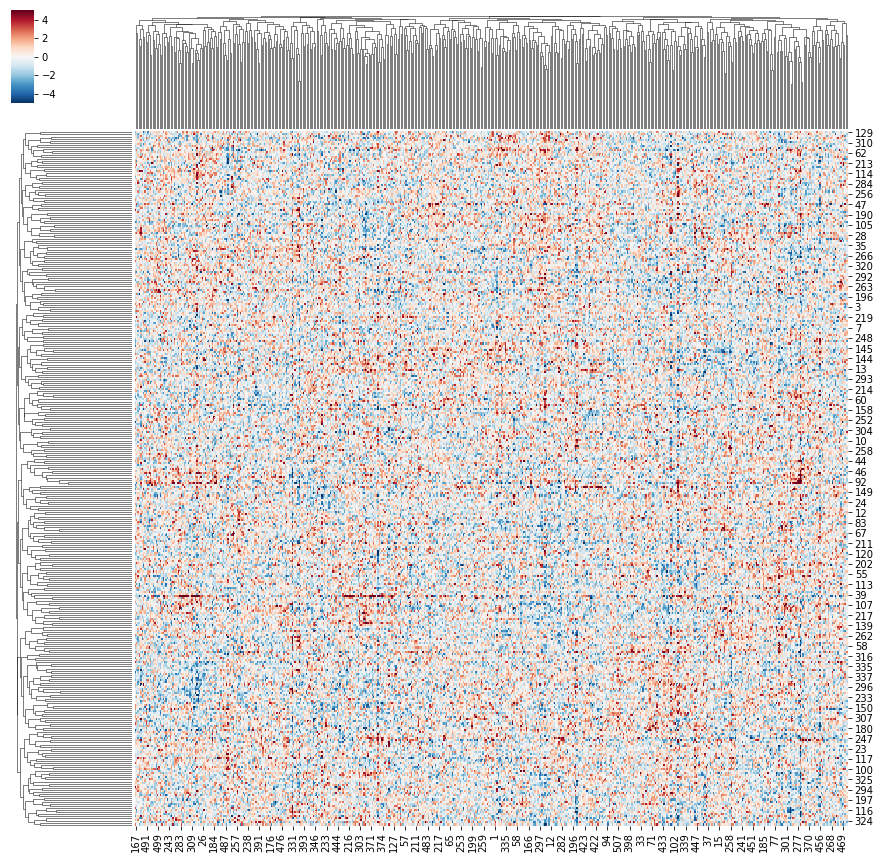

In [311]:
sns.clustermap(meta_eigen_genes2, cmap = 'RdBu_r', figsize = (15, 15), metric='correlation', vmax = 5.0, vmin = -5.0)
plt.show()

In [312]:
meta_eigen_genes2.shape

(338, 508)